In [10]:
#Import Libraries & Load Data

#pip install pandas numpy matplotlib seaborn scikit-learn joblib

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Define the path to the Excel file
file_path = r"C:\Users\user\Pictures\Prediction Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name = sheet_name)

# Display the first few rows of the fetched data
print(data.head())


  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months ASValue_Deal Phone_Service AsMultiple_Lines  ...  \
0                31       Deal 1           Yes               No  ...   
1                 9       Deal 5           Yes               No  ...   
2                28       Deal 1           Yes              Yes  ...   
3                12          NaN           Yes               No  ...   
4                27       Deal 2           Yes               No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.099998   6683.399902    

In [32]:
# Data Processing
# Check if the columns exist before dropping
columns_to_drop = ['Customer_ID', 'ASChurn_Category', 'ASChurn_Reason']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
    'Contract', 'Paperless_Billing', 'Payment_Method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
#Train Random Forest Model
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Ensure X_train and y_train are DataFrame/Series
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train)
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train)

# Separate numeric and non-numeric columns
numeric_columns = X_train.select_dtypes(include=['number']).columns
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns

# Handle missing values in numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X_train[numeric_columns] = numeric_imputer.fit_transform(X_train[numeric_columns])

# Handle missing values in non-numeric columns
if not non_numeric_columns.empty:
    non_numeric_imputer = SimpleImputer(strategy='most_frequent')
    X_train[non_numeric_columns] = non_numeric_imputer.fit_transform(X_train[non_numeric_columns])

# Convert non-numeric columns to numeric using LabelEncoder
for col in non_numeric_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])

# Ensure y_train is 1D and encode if categorical
if y_train.dtype == 'object':
    le_y = LabelEncoder()
    y_train = le_y.fit_transform(y_train)
y_train = y_train.to_numpy()  # Convert to NumPy array if necessary

# Verify shapes match
assert X_train.shape[0] == y_train.shape[0], "Mismatch between X_train and y_train!"

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Confusion Matrix:
[[840   7]
 [246 109]]
Accuracy Score: 0.7895174708818635

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       847
           1       0.94      0.31      0.46       355

    accuracy                           0.79      1202
   macro avg       0.86      0.65      0.67      1202
weighted avg       0.82      0.79      0.75      1202



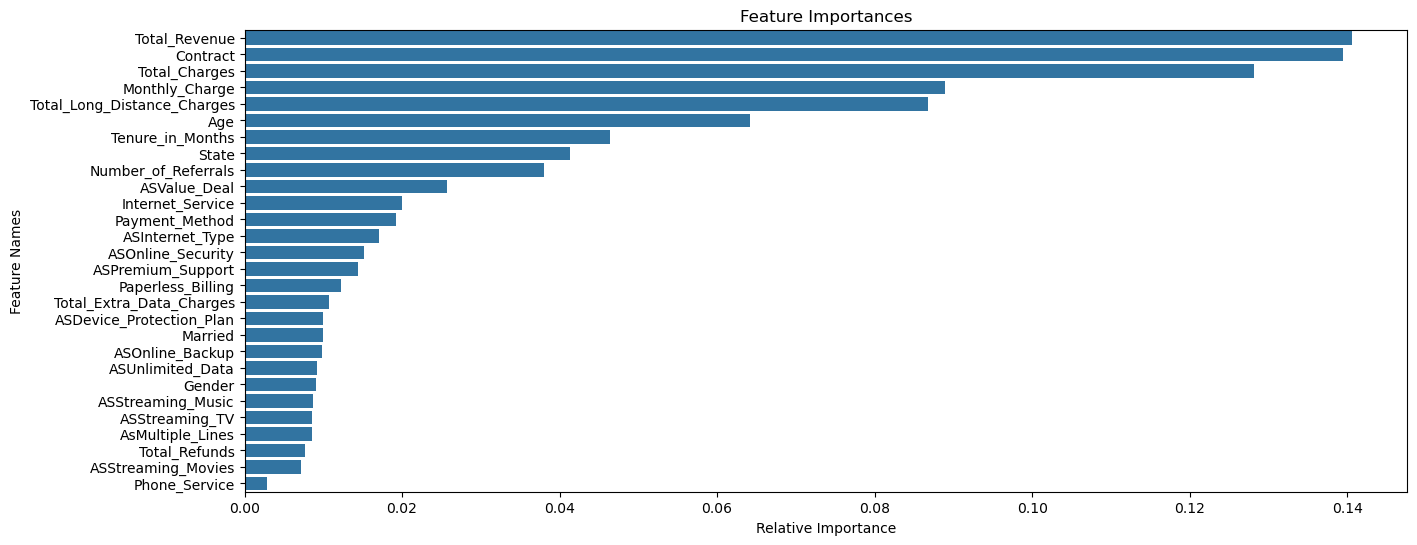

In [55]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Ensure X_test is a DataFrame
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test)

# Separate numeric and non-numeric columns
numeric_columns = X_test.select_dtypes(include=['number']).columns
non_numeric_columns = X_test.select_dtypes(exclude=['number']).columns

# Handle missing values in numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X_test[numeric_columns] = numeric_imputer.fit_transform(X_test[numeric_columns])

# Handle missing values in non-numeric columns
if not non_numeric_columns.empty:
    non_numeric_imputer = SimpleImputer(strategy='most_frequent')
    X_test[non_numeric_columns] = non_numeric_imputer.fit_transform(X_test[non_numeric_columns])

# Convert non-numeric columns to numeric using LabelEncoder
for col in non_numeric_columns:
    le = LabelEncoder()
    # Ensure consistent encoding using categories from X_train
    if col in X_train.columns:
        le.fit(X_train[col])
        # Handle unknown values in X_test
        X_test[col] = X_test[col].map(
            lambda x: le.transform([x])[0] if x in le.classes_ else -1  # Assign unknown values to -1
        )
    else:
        raise ValueError(f"Column {col} was not in the training data.")

# Ensure all columns in X_test are numeric
X_test = X_test.astype(float)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Make predictions
y_pred = rf_model.predict(X_test)



# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()





In [93]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define file path and sheet name
file_path = r"C:\Users\user\Pictures\Prediction Data.xlsx"
sheet_name = 'vw_JoinData'

# Load the data
new_data = pd.read_excel(file_path, sheet_name=sheet_name)
print("Data loaded successfully.")

# Display the original data table
print("Data preview:")
print(new_data.head())  # Display the table as it appears initially

# Preserve original data and Customer_IDs
original_data = new_data.copy()
customer_ids = new_data['Customer_ID']

# Drop unused columns
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'ASChurn_Category', 'ASChurn_Reason'], axis=1)

# Encode categorical variables
if "label_encoders" not in globals():
    label_encoders = {}

for column in new_data.select_dtypes(include=['object']).columns:
    if column not in label_encoders:
        # Dynamically fit a LabelEncoder if it's missing
        print(f"Fitting LabelEncoder for column '{column}' dynamically.")
        label_encoders[column] = LabelEncoder()
        label_encoders[column].fit(new_data[column])
    # Transform the column
    new_data[column] = new_data[column].map(
        lambda x: label_encoders[column].transform([x])[0] if x in label_encoders[column].classes_ else -1
    )

# Align with training features
for missing_col in set(rf_model.feature_names_in_) - set(new_data.columns):
    new_data[missing_col] = 0
new_data = new_data[rf_model.feature_names_in_]

# Make predictions
new_predictions = rf_model.predict(new_data)
original_data['Customer_Status_Predicted'] = new_predictions

# Filter for churned customers and save results
filtered_data = original_data[original_data['Customer_Status_Predicted'] == 1]
filtered_data.to_csv(r"C:\Users\user\Pictures\Prediction Data.csv", index=False)

print("Predictions saved successfully.")


Data loaded successfully.
Data preview:
  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_Months ASValue_Deal Phone_Service AsMultiple_Lines  ...  \
0                 7       Deal 5            No               No  ...   
1                20          NaN           Yes               No  ...   
2                35          NaN           Yes               No  ...   
3                 1          NaN           Yes               No  ...   
4                10          NaN           Yes               No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.29

In [94]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define file path and sheet name
file_path = r"C:\Users\user\Pictures\Prediction Data.xlsx"
sheet_name = 'vw_JoinData'
output_file_path = r"C:\Users\user\Pictures\Prediction Data.csv"

# Load the data
try:
    new_data = pd.read_excel(file_path, sheet_name=sheet_name)
    print("Data loaded successfully.")
except FileNotFoundError:
    raise FileNotFoundError(f"File not found at path: {file_path}")
except Exception as e:
    raise IOError(f"Error loading the file: {e}")

# Display the original data table once
print("Data preview:")
print(new_data.head())

# Preserve original data and Customer_IDs
original_data = new_data.copy()
customer_ids = new_data['Customer_ID']

# Drop unused columns
columns_to_drop = ['Customer_ID', 'Customer_Status', 'ASChurn_Category', 'ASChurn_Reason']
new_data = new_data.drop(columns=[col for col in columns_to_drop if col in new_data.columns], errors='ignore')

# Encode categorical variables
if "label_encoders" not in globals():
    label_encoders = {}

for column in new_data.select_dtypes(include=['object']).columns:
    if column not in label_encoders:
        # Dynamically fit a LabelEncoder if it's missing
        print(f"Fitting LabelEncoder for column '{column}' dynamically.")
        label_encoders[column] = LabelEncoder()
        label_encoders[column].fit(new_data[column])
    # Transform the column
    new_data[column] = new_data[column].map(
        lambda x: label_encoders[column].transform([x])[0] if x in label_encoders[column].classes_ else -1
    )

# Align with training features
for missing_col in set(rf_model.feature_names_in_) - set(new_data.columns):
    new_data[missing_col] = 0
new_data = new_data[rf_model.feature_names_in_]

# Make predictions
new_predictions = rf_model.predict(new_data)
original_data['Customer_Status_Predicted'] = new_predictions

# Filter for churned customers
filtered_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save results
try:
    filtered_data.to_csv(output_file_path, index=False)
    print(f"Predictions saved successfully to: {output_file_path}")
except FileNotFoundError:
    raise FileNotFoundError(f"The directory for the file path does not exist: {output_file_path}")
except Exception as e:
    raise IOError(f"Error saving the file: {e}")


Data loaded successfully.
Data preview:
  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_Months ASValue_Deal Phone_Service AsMultiple_Lines  ...  \
0                 7       Deal 5            No               No  ...   
1                20          NaN           Yes               No  ...   
2                35          NaN           Yes               No  ...   
3                 1          NaN           Yes               No  ...   
4                10          NaN           Yes               No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.29